<a href="https://colab.research.google.com/github/jihoonkim2100/ANPP/blob/master/ANPP_Coherent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################################################################################
"""
This is a Programming Project for Affective, Social Neuroscience (SoSe 2020).
This module provides the predictive modeling for level of immersion based on
 valence and arousal using the dataset:
<https://box.fu-berlin.de/s/2bP2cdDaeefBy2n >

Those are requirement to run this module:
    - python :
    - keras
    - matplotlib
    - mpl_toolkits
    - numpy
    - pandas
    - seaborn
    - statsmodels
    - sklearn

This modules consists of three main part:
    - design the dependent variable
    - define the data of feature
    - model analysis

We are highly recommend to use the google colab to handle the code.

Authors : Andreea, Bati, JiHoon, and Sofia.
Last-modified : 11th September 2020
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from google.colab import drive
#from google.colab import files
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras import Input
from keras.utils import to_categorical
from scipy.stats import ttest_ind
from sklearn import svm, linear_model, metrics
sns.set(style="darkgrid", color_codes=True)


# For reproducibility
np.random.seed(20201005)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
################################################################################
#              PART I: Exploratory Data Analysis and Data Cleaning
################################################################################
"""
This part follow below steps:

# 1. Loading the datset: SENT_GROUP_INFO.xlsx and SENT_RATING_DATA.xlsx
# 2. Exploratory Data Analysis: Coherent ENG+GER, HARRY AND PIPPI
# 3. Data Cleaning: Exclude the bad data with visualization
"""
################################################################################
# 1. Loading the dataset: SENT_GROUP_INFO and SENT_RATING_DATA
"""
# In google colab, mount the dataset
# If it did not work then please use the file upload
# Load the dataset
=> Figure, intuitive image needed
"""
# Upload the files at the google colab
#files.upload() # SENT_GROUP_INFO
#files.upload() # SENT_RATING

# Mount the files at the google colab
drive.mount('/gdrive', force_remount=True)

# Select the dataset based on the column
sg_index = "B:D,AE:AI,CW:DJ,DM,FN"

# Load the dataset SENT_GROUP_INFO only "B:D,AE:AI,CW:DJ,DM,FN"
"""
SENT_GROUP_INFO.xlsx
Column    Title                                     Value
B         CASE                                      1 - 97
C         TEXT                                      HARRY, PIPPI
D         CONDITION                                 COHERENT, SCRAMBLED
AE        BFI_EXTRAVERSION                          1.0 - 5.0
AB        BFI_AGREEABLENESS                         1.0 - 5.0
AC        BFI_CONSCIENTIOUSNESS                     1.0 - 5.0
AD        BFI_NEUROTICISM                           1.0 - 5.0
AE        BFI_OPENNESS                              1.0 - 5.0
CW        FOCUSING_OF_ATTENTION                     1.0 - 6.0
CX        TEXT_ABSORPTION                           1.0 - 6.0
CY        IMAGINABILITY                             1.0 - 6.0
CZ        SPATIAL_INVOLVEMENT                       1.0 - 6.0
DA        RECEPTION_TERMINATION                     1.0 - 6.0
DB        SUSPENSE                                  1.0 - 6.0
DC        EMOTIONAL_INVOLVEMENT                     1.0 - 6.0
DD        GENERAL_READING_ENJOYMENT                 1.0 - 6.0
DE        IDENTIFICATION                            1.0 - 6.0
DF        PARASOCIAL_INTERACTION                    1.0 - 6.0
DG        COGNITIVE_INVOLVEMENT                     1.0 - 6.0
DH        THEMATIC_INTEREST                         1.0 - 6.0
DI        ANALYTICAL_RECEPTION                      1.0 - 6.0
DJ        EASE_OF_COGNITIVE_ACCESS                  1.0 - 6.0
DM        ATTENTION_CHECKS_COUNT_WRONG_ANSWERS      0 - 3
FN        DEG_TIME                                  BAD DATA > 100

print(s_group.columns) # Check the index of SENT_GROUP_INFO
print(s_group.shape) # You can check the size of the datset
print(s_group) # Show the dataset
print(s_group.describe()) # Demographic info on the countable columns
print(s_group.info()) # Show the datset info
print(s_group.plot()) # Plot the dataset
"""
#s_group = pd.read_excel('SENT_GROUP_INFO.xlsx', usecols = sg_index)
s_grp_dir = '/gdrive/My Drive/SCAN_seminar_data/SENT_GROUP_INFO.xlsx'
s_group = pd.read_excel(s_grp_dir, usecols = sg_index)
sg_index = s_group.columns

# Load the dataset: SENT_RATING_DATA
"""
SENT_RATING_INFO.xlsx
Column    Title                                     Value
A         CASE                                      1 - 97
B         TEXT                                      HARRY, PIPI
C         CONDITION                                 COHERENT, SCRAMBLED
D         LANGUAGE                                  ENG, GER
E         PAGE_TIME                                 2 - 49883
F         SENTENCE_NUMBER                           1- 142 or 1 - 125
G         AROUSAL_RATING                            1 - 5
H         VALENCE_RATING                            1 - 7

print(s_rating.columns) # Check the index of SENT_RATING_INFO
print(s_rating.shape) # You can check the size of the datset
print(s_rating) # Show the dataset
print(s_rating.describe()) # Demographic info on the countable columns
print(s_rating.info()) # Show the datset info
print(s_rating.plot()) # Plot the dataset
"""
#s_rating = pd.read_excel('SENT_RATING_DATA.xlsx')
s_rat_dir = '/gdrive/My Drive/SCAN_seminar_data/SENT_RATING_DATA.xlsx'
s_rating = pd.read_excel(s_rat_dir)
sr_index = s_rating.columns

Mounted at /gdrive


Coherent Harry case: 26
Scrambled Harry case: 29
Coherent Pippi case: 21
Scrambled Pippi case: 21


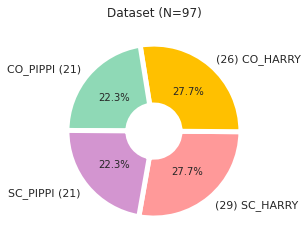

Coherent demographic informations: 
            CASE  ...   DEG_TIME
count  47.000000  ...  47.000000
mean   52.553191  ...  12.468085
std    32.319605  ...   9.652328
min     3.000000  ...   0.000000
25%    17.500000  ...   6.500000
50%    56.000000  ...  10.000000
75%    85.500000  ...  16.000000
max    97.000000  ...  45.000000

[8 rows x 22 columns]
              CASE     PAGE_TIME  ...  AROUSAL_RATING  VALENCE_RATING
count  6232.000000   6061.000000  ...     6061.000000     6061.000000
mean     53.511714     30.302755  ...        3.271737        4.410163
std      32.269431    712.250587  ...        0.958844        1.473883
min       3.000000      2.000000  ...        1.000000        1.000000
25%      18.000000      7.000000  ...        3.000000        4.000000
50%      57.000000     11.000000  ...        3.000000        4.000000
75%      87.000000     17.000000  ...        4.000000        5.000000
max      97.000000  49883.000000  ...        5.000000        7.000000

[8 rows x 5 c

In [ ]:
################################################################################
# 2. Exploratory Data Analysis: Coherent ENG+GER, HARRY AND PIPPI
"""
Exclude the scrambled dataset
Check the exploratory data analysis in the dataset
=> Figures or tables of demographic info
"""
# Data filtering in the certain conditions
# SENT_GROUP_INFO.xlsx
sg_harry = s_group['TEXT'] == 'HARRY'
sg_pippi = s_group['TEXT'] == 'PIPPI'
sg_coherent = s_group['CONDITION'] == 'COHERENT'
sg_scrambled = s_group['CONDITION'] == 'SCRAMBLED'

sg_co_harry = s_group[sg_harry & sg_coherent] # coherent and harry
sg_sc_harry = s_group[sg_harry & sg_scrambled] # scrambled and harry
sg_co_pippi = s_group[sg_pippi & sg_coherent] # coherent and pippi
sg_sc_pippi = s_group[sg_pippi & sg_scrambled] # scrambled and pippi

print('Coherent Harry case:', len(sg_co_harry))
print('Scrambled Harry case:', len(sg_sc_harry))
print('Coherent Pippi case:', len(sg_co_pippi))
print('Scrambled Pippi case:', len(sg_sc_pippi))

# SENT_GROUP_INFO.xlsx
sr_harry = s_rating['TEXT'] == 'HARRY'
sr_pippi = s_rating['TEXT'] == 'PIPPI'
sr_coherent = s_rating['CONDITION'] == 'COHERENT'
sr_scrambled = s_rating['CONDITION'] == 'SCRAMBLED'
sr_eng = s_rating['LANGUAGE'] == 'ENG'
sr_ger = s_rating['LANGUAGE'] == 'GER'

sr_co_harry = s_rating[sr_harry & sr_coherent] # coherent and harry
sr_co_pippi = s_rating[sr_pippi & sr_coherent] # coherent and pippi

# Plot the distribution of the dataset (N=97)
categories = ['(29) SC_HARRY','(26) CO_HARRY','CO_PIPPI (21)','SC_PIPPI (21)']
sizes = [len(sg_co_harry),len(sg_co_harry),len(sg_sc_pippi),len(sg_sc_pippi)]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig, ax = plt.subplots()
ax.pie(sizes,labels=categories,autopct='%1.1f%%',startangle=260,
       colors=colors,wedgeprops=wedgeprops)
plt.title('Dataset (N=97)')
plt.show()

# Use only coherent dataset
sg_co = s_group[sg_coherent]
sr_co = s_rating[sr_coherent]

# Demographic info on the countable columns
print("Coherent demographic informations: ")
print(sg_co.describe())
print(sr_co.describe())

In [ ]:
################################################################################
# 3. Data Cleaning: Exclude the bad data with visualization
"""
Exclude the bad data in coherent

DEG_TIME, CASE: NaN (>100)
ATTENTION_CHECKS_COUNT_WRONG_ANSWERS: 9, 19, 48, 84, 96 (>0)
PAGE_TIME, CASE: 19, 64, 87, 96(> 400)
b_list: 9, 19, 48, 64, 84, 96, 87 (N=7)

=> Figures or tables of demographic info

rh_set
rp_set
"""
# Check the NaN in the coherent dataset
print(sg_co.isnull().sum())
print(sr_co.isnull().sum())

# Check the demographic information
print(sg_co[sg_index[23:]].describe())
print(sr_co[sr_index[4]].describe())

# Create the Bad data list
b_DEG = sg_co.loc[sg_co['DEG_TIME']>100]['CASE']
print('b_DEG', list(b_DEG))
b_ATT = sg_co.loc[sg_co['ATTENTION_CHECKS_COUNT_WRONG_ANSWERS']>1]['CASE']
print('b_ATT', list(b_ATT))
b_PAG = sr_co.loc[sr_co['PAGE_TIME']>999]['CASE']
print('b_PAG', list(b_PAG))

# Concatenate the bad data list
b_list = pd.concat([b_DEG, b_ATT, b_PAG], axis = 0)
# print(b_list)

# Delete the duplicates and make a list
b_list = b_list.drop_duplicates()
b_case = list(b_list.values)
b_case += [55] # Delete the outlier case
print('bad data case list:',b_case)

# Excluded the bad case from the coherent dataset
a_group = sg_co.copy()
a_rating = sr_co.copy()

for i in b_case:
    a_rating = a_rating.drop(a_rating[a_rating['CASE'] == i].index)
    print(i, a_rating)
    a_group = a_group.drop(a_group[a_group['CASE'] == i].index)

print(sg_co)
print(sr_co)
print(a_group)
print(a_rating)

CASE                                    0
TEXT                                    0
CONDITION                               0
BFI_EXTRAVERSION                        0
BFI_AGREEABLENESS                       0
BFI_CONSCIENTIOUSNESS                   0
BFI_NEUROTICISM                         0
BFI_OPENNESS                            0
FOCUSING_OF_ATTENTION                   0
TEXT_ABSORPTION                         0
IMAGINABILITY                           0
SPATIAL_INVOLVEMENT                     0
RECEPTION_TERMINATION                   0
SUSPENSE                                0
EMOTIONAL_INVOLVEMENT                   0
GENERAL_READING_ENJOYMENT               0
IDENTIFICATION                          0
PARASOCIAL_INTERACTION                  0
COGNITIVE_INVOLVEMENT                   0
THEMATIC_INTEREST                       0
ANALYTICAL_RECEPTION                    0
EASE_OF_COGNITIVE_ACCESS                0
ATTENTION_CHECKS_COUNT_WRONG_ANSWERS    0
DEG_TIME                          

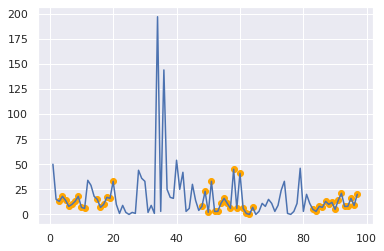

In [ ]:
# Need to plot the set of the subplots and divie pippi and harry
# Plot the DEG_TIME
plt.scatter(sg_co['CASE'], sg_co['DEG_TIME'], c='orange')
plt.plot(s_group['CASE'], s_group['DEG_TIME'])

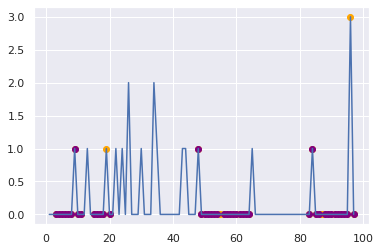

In [ ]:
# Plot the ATTENTION_COUNT_WRONG_ANSWERS
plt.scatter(sg_co['CASE'],sg_co['ATTENTION_CHECKS_COUNT_WRONG_ANSWERS'],c='orange')
plt.scatter(a_group['CASE'], a_group['ATTENTION_CHECKS_COUNT_WRONG_ANSWERS'], c='purple')
plt.plot(s_group['CASE'],s_group['ATTENTION_CHECKS_COUNT_WRONG_ANSWERS'])

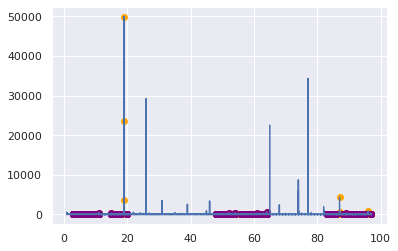

In [ ]:
# Plot the PAGE_TIME
plt.scatter(sr_co['CASE'], sr_co['PAGE_TIME'], c='orange')
plt.scatter(a_rating['CASE'], a_rating['PAGE_TIME'], c='purple')
plt.plot(s_rating['CASE'], s_rating['PAGE_TIME'])

In [ ]:
################################################################################
# Load the harry related rating dataset
rd = a_rating.loc[:, ['CASE','TEXT','LANGUAGE',"SENTENCE_NUMBER",
                      'AROUSAL_RATING','VALENCE_RATING']]
print(rd.shape, 'Total')

# Load the harry related rating dataset
print('Sent Rating Dataset for Input')
rh = rd.loc[rd['TEXT']=='HARRY']
print(rh.shape, 'Coherent Text, Harry')
rh_eng = rh.loc[rh['LANGUAGE']=='ENG']
rh_ger = rh.loc[rh['LANGUAGE']=='GER']
print(rh_eng.shape,'HARRY ENG')
print(rh_ger.shape,'HARRY GER')

(5681, 6) Total
Sent Rating Dataset for Input
(3125, 6) Coherent Text, Harry
(2000, 6) HARRY ENG
(1125, 6) HARRY GER


In [ ]:
# Load the pippi related rating dataset
rp = rd.loc[rd['TEXT']=='PIPPI']
print(rp.shape, 'Coherent Text, Pippi')

# Delete the NAN dataset
rp_eng = rp.loc[rp['LANGUAGE']=='ENG'].dropna(axis=0)
rp_ger = rp.loc[rp['LANGUAGE']=='GER'].dropna(axis=0)
print(rp_eng.shape,'PIPPI ENG')
print(rp_ger.shape,'PIPPI GER')

(2556, 6) Coherent Text, Pippi
(1729, 6) PIPPI ENG
(680, 6) PIPPI GER


In [ ]:
# Check the NaN dataset
print(rh_eng.shape, 'HARRY ENG')
print(rh_eng.isnull().sum(), 'NaN')
print(rh_ger.shape, 'HARRY GER')
print(rh_ger.isnull().sum(), 'NaN')

# Check the NaN dataset
print(rp_eng.shape, 'PIPPI ENG')
print(rp_eng.isnull().sum(), 'NaN')
print(rp_ger.shape, 'PIPPI GER')
print(rp_ger.isnull().sum(), 'NaN')

(2000, 6) HARRY ENG
CASE               0
TEXT               0
LANGUAGE           0
SENTENCE_NUMBER    0
AROUSAL_RATING     0
VALENCE_RATING     0
dtype: int64 NaN
(1125, 6) HARRY GER
CASE               0
TEXT               0
LANGUAGE           0
SENTENCE_NUMBER    0
AROUSAL_RATING     0
VALENCE_RATING     0
dtype: int64 NaN
(1729, 6) PIPPI ENG
CASE               0
TEXT               0
LANGUAGE           0
SENTENCE_NUMBER    0
AROUSAL_RATING     0
VALENCE_RATING     0
dtype: int64 NaN
(680, 6) PIPPI GER
CASE               0
TEXT               0
LANGUAGE           0
SENTENCE_NUMBER    0
AROUSAL_RATING     0
VALENCE_RATING     0
dtype: int64 NaN


In [ ]:
rh_set = pd.concat([rh_eng, rh_ger], axis = 0)
rp_set = pd.concat([rp_eng, rp_ger], axis = 0)

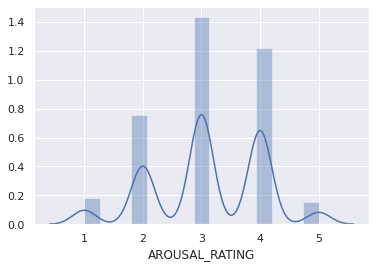

In [ ]:
################################################################################
# Harry distribution
s_rating_filtered = rh_set.filter(["VALENCE_RATING", "AROUSAL_RATING"])
# Univariate distribution of the mean of Arousal Ratings
sns.distplot(s_rating_filtered["AROUSAL_RATING"])

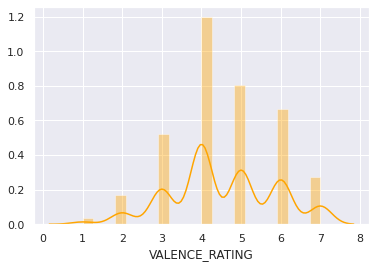

In [ ]:
# Univariate distribution of the mean of Recoded Valence Ratings
sns.distplot(s_rating_filtered['VALENCE_RATING'], color='orange')

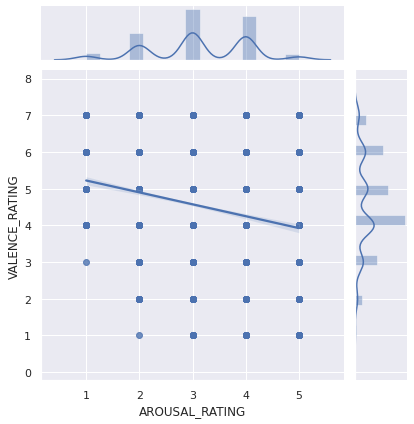

In [ ]:
# Joint plot of the means of both valence and arousal
sns.jointplot(x='AROUSAL_RATING',y='VALENCE_RATING',
              data = s_rating_filtered,kind='reg')

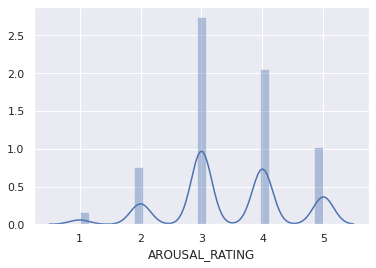

In [ ]:
################################################################################
# Pippi distribution
s_rating_filtered = rp_set.filter(["VALENCE_RATING", "AROUSAL_RATING"])
# Univariate distribution of the mean of Arousal Ratings
sns.distplot(s_rating_filtered["AROUSAL_RATING"])

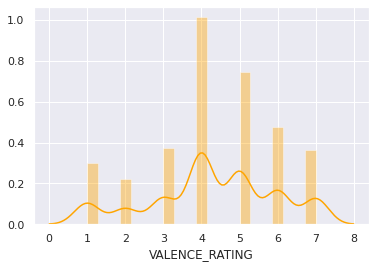

In [ ]:
# Univariate distribution of the mean of Recoded Valence Ratings
sns.distplot(s_rating_filtered['VALENCE_RATING'], color='orange')

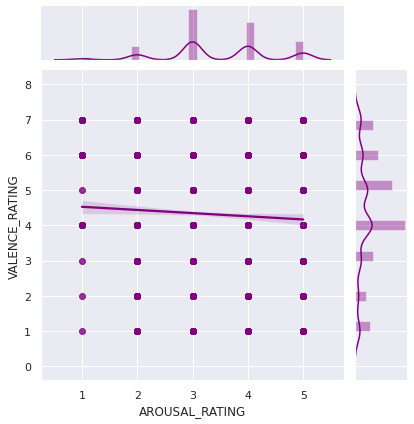

In [ ]:
# Joint plot of the means of both valence and arousal
sns.jointplot(x='AROUSAL_RATING',y='VALENCE_RATING',
              data = s_rating_filtered,kind='reg',color ='purple')

In [ ]:
"""
################################################################################
#          PART II: Design the dependent variable, level of immersion
################################################################################
"""
#Sum and mean, immersion
"""
# Check the columns order
print(a_group.columns)

# Create the new column of 'IMMERSION'
a_group['IMMERSION'] = 0

# Sum the readers response
for i in range (14):
    a_group['IMMERSION'] += a_group.iloc[:,i+8]

# Using the mean of the reader's response
a_group['IMMERSION']=a_group['IMMERSION']/14
print(a_group.head(10))
sns.distplot(a_group["IMMERSION"])
"""

'\n# Check the columns order\nprint(a_group.columns)\n\n# Create the new column of \'IMMERSION\'\na_group[\'IMMERSION\'] = 0\n\n# Sum the readers response\nfor i in range (14):\n    a_group[\'IMMERSION\'] += a_group.iloc[:,i+8]\n\n# Using the mean of the reader\'s response\na_group[\'IMMERSION\']=a_group[\'IMMERSION\']/14\nprint(a_group.head(10))\nsns.distplot(a_group["IMMERSION"])\n'

Index(['CASE', 'TEXT', 'CONDITION', 'BFI_EXTRAVERSION', 'BFI_AGREEABLENESS',
       'BFI_CONSCIENTIOUSNESS', 'BFI_NEUROTICISM', 'BFI_OPENNESS',
       'FOCUSING_OF_ATTENTION', 'TEXT_ABSORPTION', 'IMAGINABILITY',
       'SPATIAL_INVOLVEMENT', 'RECEPTION_TERMINATION', 'SUSPENSE',
       'EMOTIONAL_INVOLVEMENT', 'GENERAL_READING_ENJOYMENT', 'IDENTIFICATION',
       'PARASOCIAL_INTERACTION', 'COGNITIVE_INVOLVEMENT', 'THEMATIC_INTEREST',
       'ANALYTICAL_RECEPTION', 'EASE_OF_COGNITIVE_ACCESS',
       'ATTENTION_CHECKS_COUNT_WRONG_ANSWERS', 'DEG_TIME'],
      dtype='object')
    CASE   TEXT  ... DEG_TIME  IMMERSION
2      3  HARRY  ...       13   5.321429
3      4  HARRY  ...       18   4.321429
4      5  HARRY  ...       14   2.178571
5      6  HARRY  ...        8   4.071429
6      7  HARRY  ...       10   4.571429
7      8  HARRY  ...       13   5.750000
8      9  HARRY  ...       18   4.678571
9     10  HARRY  ...        7   4.500000
10    11  HARRY  ...        6   3.678571
14    15  PI

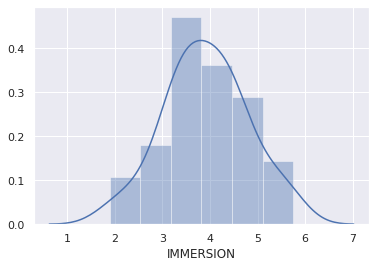

In [ ]:
################################################################################
#          PART II: Design the dependent variable, level of immersion
################################################################################
"""
Sum and mean, immersion based on Part 2 - Self Developed Scale
"""
# Check the columns order
print(a_group.columns)

# Create the new column of 'IMMERSION'
a_group['IMMERSION'] = 0

# Select the reader's responses
reader_response = [8,9,10,11,15,16,21]

# Sum the readers response
for i in reader_response:
    a_group['IMMERSION'] += a_group.iloc[:,i]

# Using the mean of the reader's response
a_group['IMMERSION']=a_group['IMMERSION']/len(reader_response)
print(a_group.head(10))
sns.distplot(a_group["IMMERSION"])

In [ ]:
################################################################################
#         PART III: Statistical Analysis Immersion with other variable
################################################################################
"""
Test the correlation between IMMERSION and each of Reading Experience,
 and check the statistic significance
"""

################################################################################
# Statistical Analysises between Immersion and 14 Reading Experience: Mean case
# Using linear regression, oridnary least square
e_group = a_group.copy()
"""
r_list = []
for i in range(14):
  r_list.append(e_group.columns[i+8])

def immersion_re_sa(r_list):
    for i, rr in enumerate(r_list):
        r_list = 'IMMERSION ~ '+ rr
        res = smf.ols(formula = r_list, data = e_group).fit()
        print(rr)
        print('R2: ', res.rsquared)
        print(res.summary())
        print('')

def immersion_re_pl(r_list):
    color = ['red','orange','yellow','green','blue','indigo','purple',
             'red','orange','yellow','green','blue','indigo','purple']
    for i, rr in enumerate(r_list):    
        sns.regplot(x = rr, y="IMMERSION", data = e_group, color = color[i])

def immersion_re_pl2(r_list):
    color = ['red','orange','yellow','green','blue','indigo','purple',
             'red','orange','yellow','green','blue','indigo','purple']
    for i, rr in enumerate(r_list):    
        sns.regplot(x = rr, y = "IMMERSION", data = e_group, color = color[i], order = 2)

immersion_re_sa(r_list)
immersion_re_pl(r_list)
immersion_re_pl2(r_list)
"""

'\nr_list = []\nfor i in range(14):\n  r_list.append(e_group.columns[i+8])\n\ndef immersion_re_sa(r_list):\n    for i, rr in enumerate(r_list):\n        r_list = \'IMMERSION ~ \'+ rr\n        res = smf.ols(formula = r_list, data = e_group).fit()\n        print(rr)\n        print(\'R2: \', res.rsquared)\n        print(res.summary())\n        print(\'\')\n\ndef immersion_re_pl(r_list):\n    color = [\'red\',\'orange\',\'yellow\',\'green\',\'blue\',\'indigo\',\'purple\',\n             \'red\',\'orange\',\'yellow\',\'green\',\'blue\',\'indigo\',\'purple\']\n    for i, rr in enumerate(r_list):    \n        sns.regplot(x = rr, y="IMMERSION", data = e_group, color = color[i])\n\ndef immersion_re_pl2(r_list):\n    color = [\'red\',\'orange\',\'yellow\',\'green\',\'blue\',\'indigo\',\'purple\',\n             \'red\',\'orange\',\'yellow\',\'green\',\'blue\',\'indigo\',\'purple\']\n    for i, rr in enumerate(r_list):    \n        sns.regplot(x = rr, y = "IMMERSION", data = e_group, color = color[

BFI_EXTRAVERSION
R2:  0.10641393424565782
                            OLS Regression Results                            
Dep. Variable:              IMMERSION   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.883
Date:                Sat, 26 Sep 2020   Prob (F-statistic):             0.0328
Time:                        20:44:00   Log-Likelihood:                -52.368
No. Observations:                  43   AIC:                             108.7
Df Residuals:                      41   BIC:                             112.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

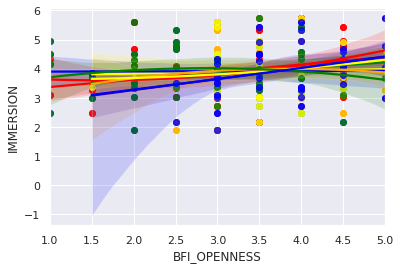

In [ ]:
################################################################################
# Statistical Analysises between Immersion and 5 BFI: Mean case
# Using linear regression, oridnary least square

bfi_list = []
for i in range(5):
    bfi_list.append(e_group.columns[i+3])

def immersion_bfi_sa(bfi_list):
    for i, bfi in enumerate(bfi_list):
        bfi_list = 'IMMERSION ~ '+ bfi
        res = smf.ols(formula =bfi_list, data = e_group).fit()
        print(bfi)
        print('R2: ', res.rsquared)
        print(res.summary())
        print('')

def immersion_bfi_pl(bfi_list):
    color = ['red','yellow','green','blue','indigo','purple']
    for i, bfi in enumerate(bfi_list):    
        sns.regplot(x = bfi, y="IMMERSION", data = e_group, color = color[i])

def immersion_bfi_pl2(bfi_list):
    color = ['red','orange','yellow','green','blue','indigo','purple',
             'red','orange','yellow','green','blue','indigo','purple']
    for i, bfi in enumerate(bfi_list):    
        sns.regplot(x = bfi, y = "IMMERSION", data = e_group,
                    color = color[i], order = 2)

immersion_bfi_sa(bfi_list)
immersion_bfi_pl(bfi_list)
immersion_bfi_pl2(bfi_list)

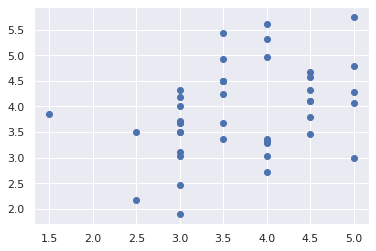

In [ ]:
################################################################################
x = e_group['BFI_OPENNESS']
y = e_group['IMMERSION']
# print(x)
# print(y)
plt.scatter(x,y)

BFI_OPENESS
                            OLS Regression Results                            
Dep. Variable:              IMMERSION   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     5.797
Date:                Sat, 26 Sep 2020   Prob (F-statistic):             0.0206
Time:                        20:44:12   Log-Likelihood:                -51.944
No. Observations:                  43   AIC:                             107.9
Df Residuals:                      41   BIC:                             111.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5075      0.598  

'\nplt.figure(figsize=(10, 2))\nplt.stem(res.resid_pearson)\nplt.axhline(2, c="g", ls="--")\nplt.axhline(-2, c="g", ls="--")\nplt.title("")\nplt.show()\n'

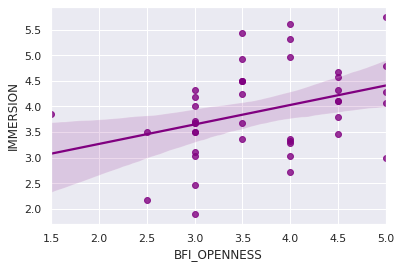

In [ ]:
################################################################################
# IMMERSION AND BFI OPENNESS
"""
9%, p-value < 0.05: candidate as the input data
"""
# Using linear regression, oridnary least square
res = smf.ols(formula='IMMERSION ~ BFI_OPENNESS', data = e_group).fit()
sns.regplot(x="BFI_OPENNESS", y="IMMERSION", data=e_group, color='purple')
print('BFI_OPENESS')
print(res.summary())

"""
plt.figure(figsize=(10, 2))
plt.stem(res.resid_pearson)
plt.axhline(2, c="g", ls="--")
plt.axhline(-2, c="g", ls="--")
plt.title("")
plt.show()
"""

BFI_OPENESS


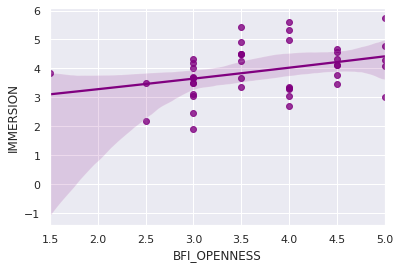

In [ ]:
################################################################################
# IMMERSION AND BFI OPENNESS
# Plot the non-linear

sns.regplot(x="BFI_OPENNESS", y="IMMERSION",
            data = e_group, order = 2, color = 'purple')
print('BFI_OPENESS')

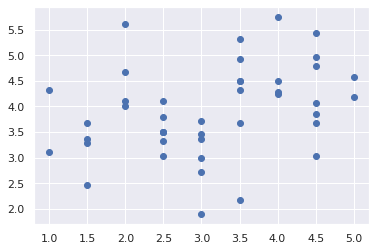

In [ ]:
################################################################################
x = e_group['BFI_EXTRAVERSION']
y = e_group['IMMERSION']
# print(x)
# print(y)
plt.scatter(x,y)

BFI_EXTRAVERSION
                            OLS Regression Results                            
Dep. Variable:              IMMERSION   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.883
Date:                Sat, 26 Sep 2020   Prob (F-statistic):             0.0328
Time:                        20:44:20   Log-Likelihood:                -52.368
No. Observations:                  43   AIC:                             108.7
Df Residuals:                      41   BIC:                             112.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.

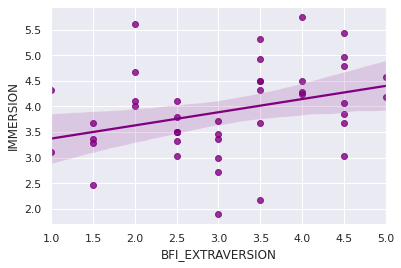

In [ ]:
################################################################################
# IMMERSION AND BFI_EXTRAVERSION
"""
25%, p-value < 0.05: candidate as the input data
"""
# Using linear regression, oridnary least square
res = smf.ols(formula='IMMERSION ~ BFI_EXTRAVERSION', data = e_group).fit()
sns.regplot(x="BFI_EXTRAVERSION", y="IMMERSION", data=e_group, color='purple')
print('BFI_EXTRAVERSION')
print(res.summary())

BFI_EXTRAVERSION


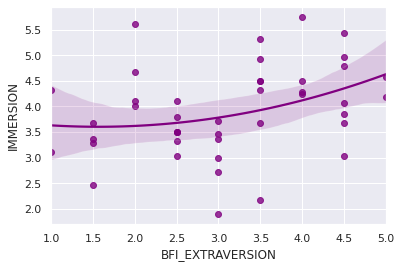

In [ ]:
################################################################################
# IMMERSION AND BFI_EXTRAVERSION
# Plot the non-linear

sns.regplot(x="BFI_EXTRAVERSION", y="IMMERSION",
            data = a_group, order = 2, color = 'purple')
print('BFI_EXTRAVERSION')

In [ ]:
################################################################################
#                    PART IV: Model based data analysis
################################################################################
"""
1. preprocess the datset:
2. train and test the model
3. predict the immersion
"""
################################################################################
# 1. Preprocess the dataset
"""
Input data: VALENCE(1-7), AROUSAL(1-5)
"""
# Case number list
gh_case = list(a_group.loc[a_group['TEXT']=='HARRY'].loc[:,['CASE']]['CASE'])
gp_case = list(a_group.loc[a_group['TEXT']=='PIPPI'].loc[:,['CASE']]['CASE'])
#print(gh_case)
#print(len(gh_case))
#print(gp_case)
#print(len(gp_case))

################################################################################
# Training set, Test set Case Number
# Harry case
tr_hr_case = gh_case[2:22]
te_hr_case = gh_case[0:2] + gh_case[22:25]
#print(tr_hr_case)
#print(te_hr_case)
hr_case = [tr_hr_case, te_hr_case]

# Pippi case
tr_pi_case = gp_case[2:14]
te_pi_case = gp_case[0:2] + gp_case[14:17]
#print(tr_pi_case)
#print(te_pi_case)
pi_case = [tr_pi_case, te_pi_case]

# Load the independent variable related dataset

# HARRY
# Extract both Arousal and Valence
hr_train_arousal = []
hr_train_valence = []
hr_test_arousal = []
hr_test_valence = []

for i in hr_case:
    for j in i:
        if i == tr_hr_case:
            set = rh_set[rh_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            hr_train_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            hr_train_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))
        else:
            set = rh_set[rh_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            hr_test_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            hr_test_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))

# PIPPI
# Extract both Arousal and Valence
pi_train_arousal = []
pi_train_valence = []
pi_test_arousal = []
pi_test_valence = []

for i in pi_case:
    for j in i:
        if i == tr_pi_case:
            set = rp_set[rp_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            pi_train_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            pi_train_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))
        else:
            set = rp_set[rp_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            pi_test_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            pi_test_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))

print('Coherent HARRY Dataset')
print('train_arousal:',len(hr_train_arousal),hr_train_arousal)
print('train_valence:',len(hr_train_valence),hr_train_valence)
print('test_arousal:',len(hr_test_arousal),hr_test_arousal)
print('test_valence:',len(hr_test_valence),hr_test_valence)

print('Coherent PIPPI Dataset')
print('train_arousal:',len(pi_train_arousal),pi_train_arousal)
print('train_valence:',len(pi_train_valence),pi_train_valence)
print('test_arousal:',len(pi_test_arousal),pi_test_arousal)
print('test_valence:',len(pi_test_valence),pi_test_valence)

Coherent HARRY Dataset
train_arousal: 20 [[5.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0], [4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 2.0, 1.0, 4.0, 3.0, 5.0, 5.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 

In [ ]:
################################################################################
#                    PART IV: Model based data analysis
################################################################################
"""
1. preprocess the datset:
2. train and test the model
3. predict the immersion
"""
################################################################################
# 1. Preprocess the dataset
"""
Input data: VALENCE(1-7), AROUSAL(1-5)
"""
# Case number list
gh_case = list(a_group.loc[a_group['TEXT']=='HARRY'].loc[:,['CASE']]['CASE'])
gp_case = list(a_group.loc[a_group['TEXT']=='PIPPI'].loc[:,['CASE']]['CASE'])
#print(gh_case)
#print(len(gh_case))
#print(gp_case)
#print(len(gp_case))

################################################################################
# Training set, Test set Case Number
# Harry case
tr_hr_case = gh_case[2:22]
te_hr_case = gh_case[0:2] + gh_case[22:25]
#print(tr_hr_case)
#print(te_hr_case)
hr_case = [tr_hr_case, te_hr_case]

# Pippi case
tr_pi_case = gp_case[2:14]
te_pi_case = gp_case[0:2] + gp_case[14:17]
#print(tr_pi_case)
#print(te_pi_case)
pi_case = [tr_pi_case, te_pi_case]

# Load the independent variable related dataset

# HARRY
# Extract both Arousal and Valence
hr_train_arousal = []
hr_train_valence = []
hr_test_arousal = []
hr_test_valence = []

for i in hr_case:
    for j in i:
        if i == tr_hr_case:
            set = rh_set[rh_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            hr_train_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            hr_train_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))
        else:
            set = rh_set[rh_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            hr_test_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            hr_test_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))

# PIPPI
# Extract both Arousal and Valence
pi_train_arousal = []
pi_train_valence = []
pi_test_arousal = []
pi_test_valence = []

for i in pi_case:
    for j in i:
        if i == tr_pi_case:
            set = rp_set[rp_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            pi_train_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            pi_train_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))
        else:
            set = rp_set[rp_set['CASE']==j]
            #new = set.sort_values(by='SENTENCE_NUMBER')
            pi_test_arousal.append(list(set.loc[:,['AROUSAL_RATING']]['AROUSAL_RATING']))
            pi_test_valence.append(list(set.loc[:,['VALENCE_RATING']]['VALENCE_RATING']))

print('Coherent HARRY Dataset')
print('train_arousal:',len(hr_train_arousal),hr_train_arousal)
print('train_valence:',len(hr_train_valence),hr_train_valence)
print('test_arousal:',len(hr_test_arousal),hr_test_arousal)
print('test_valence:',len(hr_test_valence),hr_test_valence)

print('Coherent PIPPI Dataset')
print('train_arousal:',len(pi_train_arousal),pi_train_arousal)
print('train_valence:',len(pi_train_valence),pi_train_valence)
print('test_arousal:',len(pi_test_arousal),pi_test_arousal)
print('test_valence:',len(pi_test_valence),pi_test_valence)

Coherent HARRY Dataset
train_arousal: 20 [[5.0, 4.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0], [4.0, 4.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 2.0, 1.0, 4.0, 3.0, 5.0, 5.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 4.0, 

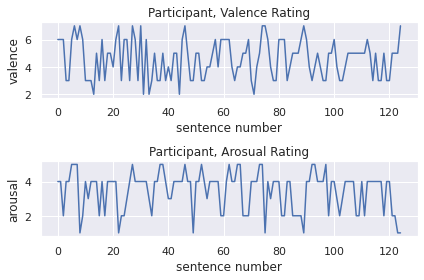

In [ ]:
################################################################################
# Plot the valence and arousal data

t = hr_train_valence[4]
s = hr_train_arousal[4]

# Valence rating
plt.subplot(2, 1, 1)
plt.plot(t)
plt.xlabel('sentence number')
plt.ylabel('valence')
plt.title('Participant, Valence Rating')
plt.grid(True)

# Arousal rating
plt.subplot(2, 1, 2)
plt.plot(s)
plt.title('Participant, Arosual Rating')
plt.xlabel('sentence number')
plt.ylabel('arousal')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Load the dependent variable related dataset
# Load the dependent variable related dataset
#output = e_group.loc[:, ['CASE','IMMERSION']]

# HARRY IMMERSION DATASET
hr_train_immersion = []
hr_test_immersion = []

for i in hr_case:
    for j in i:
        if i == tr_hr_case:
            hr_train_immersion.append(list(a_group[a_group['CASE']==j]['IMMERSION']))
        else:
            hr_test_immersion.append(list(a_group[a_group['CASE']==j]['IMMERSION']))

print('hr_train_immersion',len(hr_train_immersion),hr_train_immersion)
print('hr_test_immersion',len(hr_test_immersion),hr_test_immersion)

# PIPPI IMMERSION DATASET
pi_train_immersion = []
pi_test_immersion = []

for i in pi_case:
    for j in i:
        if i == tr_pi_case:
            pi_train_immersion.append(list(a_group[a_group['CASE']==j]['IMMERSION']))
        else:
            pi_test_immersion.append(list(a_group[a_group['CASE']==j]['IMMERSION']))

print('pi_train_immersion',len(pi_train_immersion),pi_train_immersion)
print('pi_test_immersion',len(pi_test_immersion),pi_test_immersion)

hr_train_immersion 20 [[2.1785714285714284], [4.071428571428571], [4.571428571428571], [5.75], [4.678571428571429], [4.5], [3.6785714285714284], [3.3214285714285716], [2.4642857142857144], [4.321428571428571], [3.5], [4.107142857142857], [3.357142857142857], [3.357142857142857], [4.785714285714286], [3.0], [4.285714285714286], [3.4642857142857144], [1.8928571428571428], [3.6785714285714284]]
hr_test_immersion 5 [[5.321428571428571], [4.321428571428571], [3.7142857142857144], [5.428571428571429], [3.857142857142857]]
pi_train_immersion 12 [[4.964285714285714], [3.0357142857142856], [3.7857142857142856], [5.607142857142857], [4.5], [3.0357142857142856], [4.0], [4.928571428571429], [3.2857142857142856], [4.25], [4.5], [4.178571428571429]]
pi_test_immersion 5 [[4.107142857142857], [3.5], [2.7142857142857144], [3.5], [3.6785714285714284]]


In [ ]:
################################################################################
# Dataset as np.array

# HARRY DATASET
print('HARRY Dataset')
hr_tr_arousal = np.array(hr_train_arousal)
hr_tr_valence = np.array(hr_train_valence)
hr_tr_immersion = np.array(hr_train_immersion)

hr_te_arousal = np.array(hr_test_arousal)
hr_te_valence = np.array(hr_test_valence)
hr_te_immersion = np.array(hr_test_immersion)

print('PIPPI Training set')
print('hr_tr_arousal',hr_tr_arousal.shape,hr_tr_arousal)
print('hr_tr_valence',hr_tr_valence.shape,hr_tr_valence)
print('hr_tr_immersion',hr_tr_immersion.shape,hr_tr_immersion)

print('PIPPI Test set')
print(hr_te_arousal)
print(hr_te_valence)
print(hr_te_immersion)

# PIPPI DATASET
print('PIPPI Dataset')
pi_tr_arousal = np.array(pi_train_arousal)
pi_tr_valence = np.array(pi_train_valence)
pi_tr_immersion = np.array(pi_train_immersion)

pi_te_arousal = np.array(pi_test_arousal)
pi_te_valence = np.array(pi_test_valence)
pi_te_immersion = np.array(pi_test_immersion)

print('PIPPI Training set')
print('pi_tr_arousal',pi_tr_arousal.shape,pi_tr_arousal)
print('pi_tr_valence',pi_tr_valence.shape,pi_tr_valence)
print('pi_tr_immersion',pi_tr_immersion.shape,pi_tr_immersion)

print('PIPPI Test set')
print(pi_te_arousal)
print(pi_te_valence)
print(pi_te_immersion)

HARRY Dataset
PIPPI Training set
hr_tr_arousal (20, 125) [[5. 4. 3. ... 2. 2. 2.]
 [4. 4. 4. ... 3. 4. 5.]
 [5. 4. 4. ... 4. 4. 3.]
 ...
 [4. 4. 4. ... 3. 4. 4.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 4. 5. ... 2. 2. 3.]]
hr_tr_valence (20, 125) [[1. 2. 4. ... 5. 5. 6.]
 [5. 3. 5. ... 4. 4. 6.]
 [5. 5. 4. ... 5. 6. 7.]
 ...
 [5. 4. 4. ... 4. 4. 4.]
 [4. 4. 3. ... 4. 4. 4.]
 [6. 6. 7. ... 6. 7. 6.]]
hr_tr_immersion (20, 1) [[2.17857143]
 [4.07142857]
 [4.57142857]
 [5.75      ]
 [4.67857143]
 [4.5       ]
 [3.67857143]
 [3.32142857]
 [2.46428571]
 [4.32142857]
 [3.5       ]
 [4.10714286]
 [3.35714286]
 [3.35714286]
 [4.78571429]
 [3.        ]
 [4.28571429]
 [3.46428571]
 [1.89285714]
 [3.67857143]]
PIPPI Test set
[[4. 2. 1. 1. 1. 3. 4. 4. 2. 3. 3. 2. 4. 4. 3. 2. 2. 2. 2. 2. 4. 2. 1. 4.
  2. 2. 3. 2. 4. 3. 3. 2. 3. 2. 3. 2. 1. 4. 5. 4. 4. 2. 3. 3. 5. 1. 4. 3.
  4. 4. 2. 2. 1. 2. 2. 2. 2. 2. 4. 1. 3. 2. 4. 4. 4. 4. 5. 2. 2. 3. 4. 4.
  5. 2. 1. 3. 2. 1. 4. 4. 4. 2. 1. 4. 4. 2. 2. 1. 3. 1. 4. 3. 3. 

In [ ]:
################################################################################
# Concatenate to design flatten (2,) dataset

# HARRY DATATSET
print(hr_tr_arousal.shape)
print(hr_tr_valence.shape)
print(hr_te_arousal.shape)
print(hr_te_valence.shape)
hr_tr_dataset = np.stack([hr_tr_arousal, hr_tr_valence], axis=0)
hr_te_dataset = np.stack([hr_te_arousal, hr_te_valence], axis=0)

print(hr_tr_dataset.shape)
print(hr_te_dataset.shape)

# PIPPI DATASET
print(pi_tr_arousal.shape)
print(pi_tr_valence.shape)
print(pi_te_arousal.shape)
print(pi_te_valence.shape)
pi_tr_dataset = np.stack([pi_tr_arousal, pi_tr_valence], axis=0)
pi_te_dataset = np.stack([pi_te_arousal, pi_te_valence], axis=0)

print(pi_tr_dataset.shape)
print(pi_te_dataset.shape)

(20, 125)
(20, 125)
(5, 125)
(5, 125)
(2, 20, 125)
(2, 5, 125)
(12,)
(12,)
(5,)
(5,)
(2, 12)
(2, 5)


In [ ]:
hr_tr_dataset = np.concatenate((hr_tr_arousal, hr_tr_valence), axis = 1)
hr_te_dataset = np.concatenate((hr_te_arousal, hr_te_valence), axis = 1)
print(hr_tr_dataset.shape,'tr_dataset')
print(hr_tr_dataset)
print(hr_te_dataset.shape,'te_dataset')
print(hr_te_dataset)

(20, 250) tr_dataset
[[5. 4. 3. ... 5. 5. 6.]
 [4. 4. 4. ... 4. 4. 6.]
 [5. 4. 4. ... 5. 6. 7.]
 ...
 [4. 4. 4. ... 4. 4. 4.]
 [3. 3. 3. ... 4. 4. 4.]
 [3. 4. 5. ... 6. 7. 6.]]
(5, 250) te_dataset
[[4. 2. 1. ... 6. 7. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 5. ... 4. 4. 5.]
 [3. 5. 5. ... 5. 4. 4.]
 [5. 4. 4. ... 5. 5. 6.]]


In [ ]:
################################################################################
# 2. train and test the model
# Linear or non-linear Regression

train_data = hr_tr_dataset.copy()
test_data = hr_te_dataset.copy()
train_label = hr_tr_immersion.copy()
test_label = hr_te_immersion.copy()

In [ ]:
################################################################################
# 2. train and test the model
# SVR, Support Vector Regressor

train_data = hr_tr_dataset.copy()
test_data = hr_te_dataset.copy()
train_label = hr_tr_immersion.copy()
test_label = hr_te_immersion.copy()

In [ ]:
################################################################################
# 2. train and test the model
# XGB

train_data = hr_tr_dataset.copy()
test_data = hr_te_dataset.copy()
train_label = hr_tr_immersion.copy()
test_label = hr_te_immersion.copy()

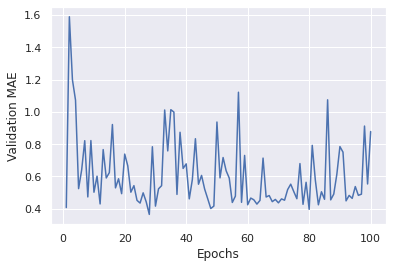

1/1 [==============================] - 0s 2ms/step - loss: 0.3073 - mae: 0.5114
expected_value 4.853729724884033 	 real_value [5.32142857]
expected_value 4.059655666351318 	 real_value [4.32142857]
expected_value 4.040308475494385 	 real_value [3.71428571]
expected_value 4.589372158050537 	 real_value [5.42857143]
expected_value 4.519657611846924 	 real_value [3.85714286]


In [ ]:
################################################################################
# 2. train and test the model
# NN, simple one

train_data = hr_tr_dataset.copy()
test_data = hr_te_dataset.copy()
train_label = hr_tr_immersion.copy()
test_label = hr_te_immersion.copy()

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs = num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_scores.append(mae_history)

plt.plot(range(1, len(mae_history)+1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

test_mse_score, test_mae_score = model.evaluate(test_data, test_label)

result = model.predict(test_data, verbose=0)
for i, e in enumerate(result):
    print("expected_value",sum(e,0.0)/len(e), '\t', "real_value", test_label[i])

processing fold #: 1
processing fold #: 2
processing fold #: 3
processing fold #: 4


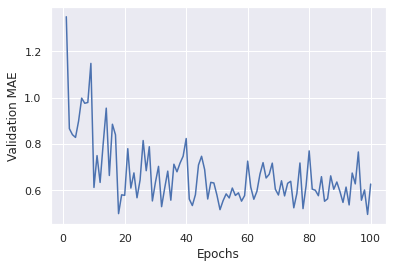

1/1 [==============================] - 0s 3ms/step - loss: 0.7005 - mae: 0.7269
expected_value 4.4726104736328125 	 real_value [5.32142857]
expected_value 3.7389907836914062 	 real_value [4.32142857]
expected_value 4.053408622741699 	 real_value [3.71428571]
expected_value 3.953313112258911 	 real_value [5.42857143]
expected_value 4.246061325073242 	 real_value [3.85714286]


In [ ]:
# 2. train and test the model
################################################################################
# Nueral network, Regression: Grid Search, Hyper parameter tuning
################################################################################

train_data = hr_tr_dataset.copy()
test_data = hr_te_dataset.copy()
train_label = hr_tr_immersion.copy()
test_label = hr_te_immersion.copy()

# Define the model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# K-fold cross-validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_scores = []
for i in range(k):
    print('processing fold #:', i+1)
    val_data = train_data[i*num_val_samples: (i + 1)*num_val_samples]
    val_targets = train_label[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0)
    partial_train_targets = np.concatenate(
        [train_label[:i * num_val_samples],
         train_label[(i + 1) * num_val_samples:]],
         axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs = num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_scores.append(mae_history)
    # val_mse, val_mae = model.evaluate(val_data, val_targets, vebose=0)
    # all_scores.append(val_mae)

average_mae_history = [np.mean([x[i] for x in all_mae_scores]) for i in range(num_epochs)]

# Validation MAE Visualization
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Final model
model = build_model()
model.fit(train_data, train_label,
          epochs=60, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_label)

result = model.predict(test_data, verbose=0)
for i, e in enumerate(result):
    print("expected_value",sum(e,0.0)/len(e), '\t', "real_value", test_label[i])